In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 6

In [2]:
df = pd.read_csv('6_combined_loan_to_value_ratio.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137500 entries, 0 to 137499
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              137495 non-null  float64
 1   action_taken                              137500 non-null  int64  
 2   loan_type                                 137500 non-null  int64  
 3   lien_status                               137500 non-null  int64  
 4   reverse_mortgage                          137500 non-null  int64  
 5   open_end_line_of_credit                   137500 non-null  int64  
 6   loan_amount                               137500 non-null  int64  
 7   combined_loan_to_value_ratio              137094 non-null  float64
 8   interest_rate                             137500 non-null  object 
 9   total_loan_costs                          110512 non-null  object 
 10  origination_charges 

In [4]:
print(df['total_loan_costs'].value_counts())

0.0        3386
695.0      2271
635.43     1539
15.43       815
505.43      647
           ... 
3492.8        1
4552.33       1
3506.06       1
4163.23       1
3375.5        1
Name: total_loan_costs, Length: 61306, dtype: int64


In [5]:
unique_categories = df['total_loan_costs'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 61306


In [6]:
# First, convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['total_loan_costs'].min()
maximum_interest_rate = df['total_loan_costs'].max()
median_interest_rate = df['total_loan_costs'].median()

print("Minimum total_loan_costs:", minimum_interest_rate)
print("Maximum total_loan_costs:", maximum_interest_rate)
print("Median total_loan_costs:", median_interest_rate)

Minimum total_loan_costs: 0.0
Maximum total_loan_costs: 389990.0
Median total_loan_costs: 3055.93


In [7]:
# Convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['total_loan_costs'].quantile(0.25)
Q3 = df['total_loan_costs'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_loan_costs'] < lower_bound) | (df['total_loan_costs'] > upper_bound)]

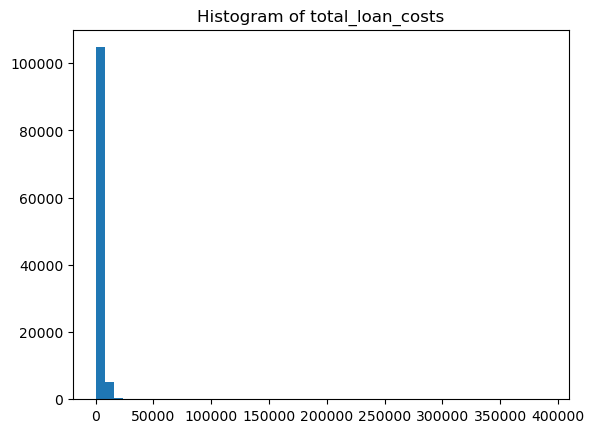

In [8]:
plt.hist(df['total_loan_costs'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of total_loan_costs')
plt.show()

[8352.71 6854.68 2288.   ... 5602.8  7362.69 3375.5 ]
27099


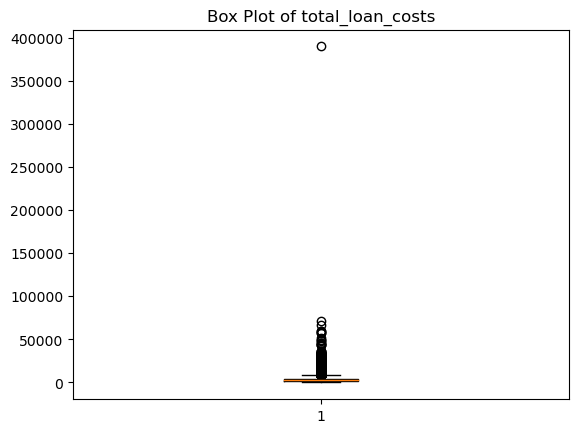

In [9]:
df1 = df.copy()
df1['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')
df1 = df1.dropna(subset=['total_loan_costs'])

print(df['total_loan_costs'].unique())
print(df['total_loan_costs'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['total_loan_costs'])
plt.title('Box Plot of total_loan_costs')
plt.show()

## The outlier squashes the data.
We can draw a boxplot without the outlier.

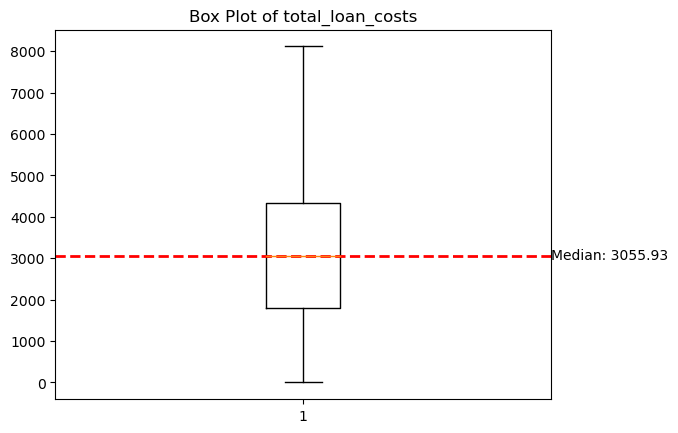

In [10]:
import matplotlib.pyplot as plt

# Create a box plot of the 'total_loan_costs' column
plt.boxplot(df1['total_loan_costs'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of total_loan_costs')

# Calculate the median value
median_value = df1['total_loan_costs'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.5, median_value + 5, f'Median: {median_value}', va='center')

plt.show()


# Conclusion

this meadian seems more normal!
we have to remove outliers.

# Remove outliers

In [11]:
# Calculate the IQR for total_loan_costs
Q1 = df1['total_loan_costs'].quantile(0.25)
Q3 = df1['total_loan_costs'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['total_loan_costs'] < lower_bound) | (df1['total_loan_costs'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 5045


In [12]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

In [13]:
# Display the values of the removed outliers
print(outliers_df['total_loan_costs'])

0          8352.71
5         10568.20
11        18135.90
12        11246.50
16        11558.10
            ...   
137436    27738.12
137438     8737.68
137476    11266.92
137490     8721.39
137491    12187.00
Name: total_loan_costs, Length: 5045, dtype: float64


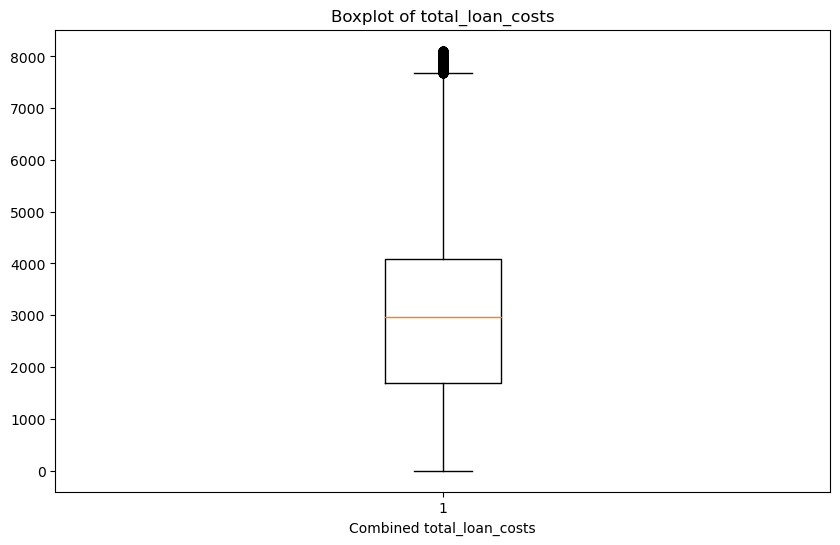

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['total_loan_costs'])
plt.title('Boxplot of total_loan_costs')
plt.xlabel('Combined total_loan_costs')
plt.show()

In [15]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df_no_outliers.loc[:, 'total_loan_costs'] = pd.to_numeric(df_no_outliers['total_loan_costs'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df_no_outliers['total_loan_costs'].min()
maximum_interest_rate = df_no_outliers['total_loan_costs'].max()
median_interest_rate = df_no_outliers['total_loan_costs'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 0.0
Maximum Interest Rate: 8111.47
Median Interest Rate: 2968.05


C:\Users\marku\AppData\Local\Temp\ipykernel_27408\2495745558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:, 'total_loan_costs'] = pd.to_numeric(df_no_outliers['total_loan_costs'], errors='coerce')


In [16]:
print(df_no_outliers['total_loan_costs'].value_counts())

0.00       3386
695.00     2271
635.43     1539
15.43       815
505.43      647
           ... 
5104.38       1
3421.61       1
1744.55       1
7707.93       1
3375.50       1
Name: total_loan_costs, Length: 56375, dtype: int64


In [17]:
# Remove categories below 100 entries.

#threshold = 100
#counts = df_no_outliers['total_loan_costs'].value_counts()
#values_to_remove = counts[counts < threshold].index
#df_filtered = df_no_outliers[~df_no_outliers['total_loan_costs'].isin(values_to_remove)]


# Make range categories

In [18]:
new_df = df_no_outliers.copy()

# Define a function to categorize 'total_loan_costs' into the desired ranges
def categorize_total_loan_costs(cost):
    # Define a list of upper bounds for the ranges
    upper_bounds = [500 * i for i in range(1, 41)]  # Generates ranges up to 8000 in increments of 200
    labels = [f'{lower}-{upper}' for lower, upper in zip([0] + upper_bounds, upper_bounds)]
    
    # Find the appropriate range for 'total_loan_costs' and return the label
    for label, upper_bound in zip(labels, upper_bounds):
        if cost <= upper_bound:
            return label
    return 'Other'

# Apply the categorization function to 'total_loan_costs' column
new_df['total_loan_costs'] = new_df['total_loan_costs'].apply(categorize_total_loan_costs)

# Print the result
print(new_df['total_loan_costs'].value_counts())

2500-3000    13825
3000-3500    13528
500-1000     13103
3500-4000    10429
2000-2500     9708
4000-4500     7537
0-500         7087
4500-5000     5659
1500-2000     5655
1000-1500     4224
5000-5500     4138
5500-6000     3240
6000-6500     2511
6500-7000     1913
7000-7500     1494
7500-8000     1111
8000-8500      194
Name: total_loan_costs, dtype: int64


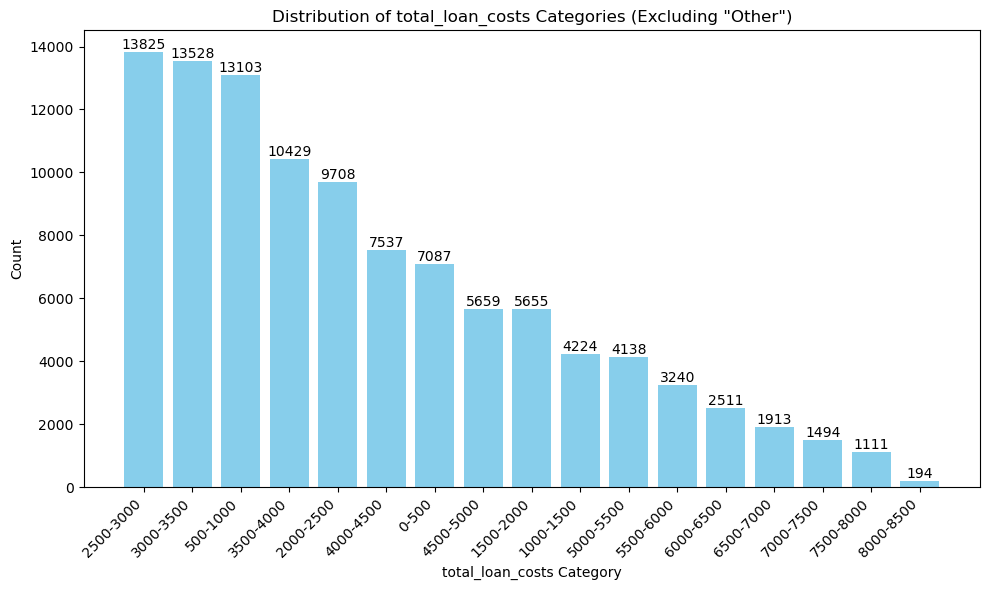

In [19]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = new_df[new_df['total_loan_costs'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['total_loan_costs'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('total_loan_costs Category')
plt.ylabel('Count')
plt.title('Distribution of total_loan_costs Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [20]:
df.to_csv('7_total_loan_costs.csv', index=False)